# Plot lidar profiles

Download Lidars.zip file from https://app.box.com/s/o6xh24i0liygn10eh6duup4spd7pxcvu.

Also can download here: https://github.com/lawrenceccheung/AWAKEN_summit_setup/releases/download/v0.0.0-temp1/A1_profiling_lidar_1s.nc

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd 
import numpy as np

In [2]:
# Define the path to your NetCDF file
file_path = 'A1_profiling_lidar_10min.nc'
#file_path = 'A1_profiling_lidar_1s.nc'
# Open the NetCDF file
ds = xr.open_dataset(file_path)

In [3]:
# Print the dataset information
print("Dataset information:")
print(ds)

# Print the variable names
print("\nVariable names:")
print(ds.variables)

# Print the dimensions
print("\nDimensions:")
print(ds.dims)

Dataset information:
<xarray.Dataset>
Dimensions:  (time: 426, height: 11)
Coordinates:
  * time     (time) datetime64[ns] 2023-08-22T23:55:00 ... 2023-08-25T23:45:00
  * height   (height) int64 40 60 80 100 120 140 160 180 200 220 240
Data variables:
    U        (time, height) float64 ...
    WD       (time, height) float64 ...
    w        (time, height) float64 ...
    CNR      (time, height) float64 ...

Variable names:
Frozen({'U': <xarray.Variable (time: 426, height: 11)>
[4686 values with dtype=float64], 'WD': <xarray.Variable (time: 426, height: 11)>
[4686 values with dtype=float64], 'w': <xarray.Variable (time: 426, height: 11)>
[4686 values with dtype=float64], 'CNR': <xarray.Variable (time: 426, height: 11)>
[4686 values with dtype=float64], 'time': <xarray.IndexVariable 'time' (time: 426)>
array(['2023-08-22T23:55:00.000000000', '2023-08-23T00:05:00.000000000',
       '2023-08-23T00:15:00.000000000', ..., '2023-08-25T23:25:00.000000000',
       '2023-08-25T23:35:00.0000000

In [4]:
## Print coordinate values
#print("\nCoordinates:")
#for coord in ds.coords:
#    print(f"{coord}: {ds.coords[coord].values}")

# Access specific variables
print("\nSample data from variable 'U':")
print(ds['U'])


Sample data from variable 'U':
<xarray.DataArray 'U' (time: 426, height: 11)>
[4686 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2023-08-22T23:55:00 ... 2023-08-25T23:45:00
  * height   (height) int64 40 60 80 100 120 140 160 180 200 220 240


Text(0, 0.5, 'z [m]')

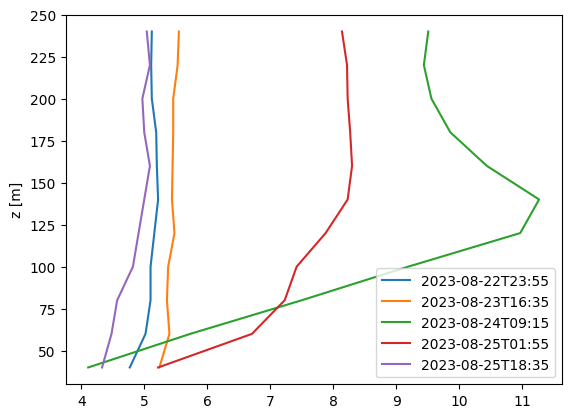

In [8]:
for i in [0, 100, 200, 300, 400]:
    ts = ds['U']['time'][i]
    plt.plot(ds['U'].values[i,:], ds['U']['height'].values, label=np.datetime_as_string(ts)[:16])

plt.legend()
plt.ylabel('z [m]')

Text(0, 0.5, 'z [m]')

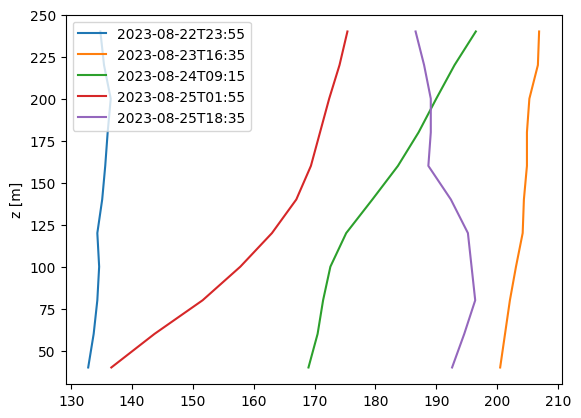

In [9]:
for i in [0, 100, 200, 300, 400]:
    ts = ds['WD']['time'][i]
    plt.plot(ds['WD'].values[i,:], ds['WD']['height'].values, label=np.datetime_as_string(ts)[:16])

plt.legend()
plt.ylabel('z [m]')

In [10]:
# Define the path to your NetCDF file
file_path = 'A1_scanning_lidar_10min_phase1.nc'
# Open the NetCDF file
TKEds = xr.open_dataset(file_path)

Text(0.5, 1.0, 'TKE')

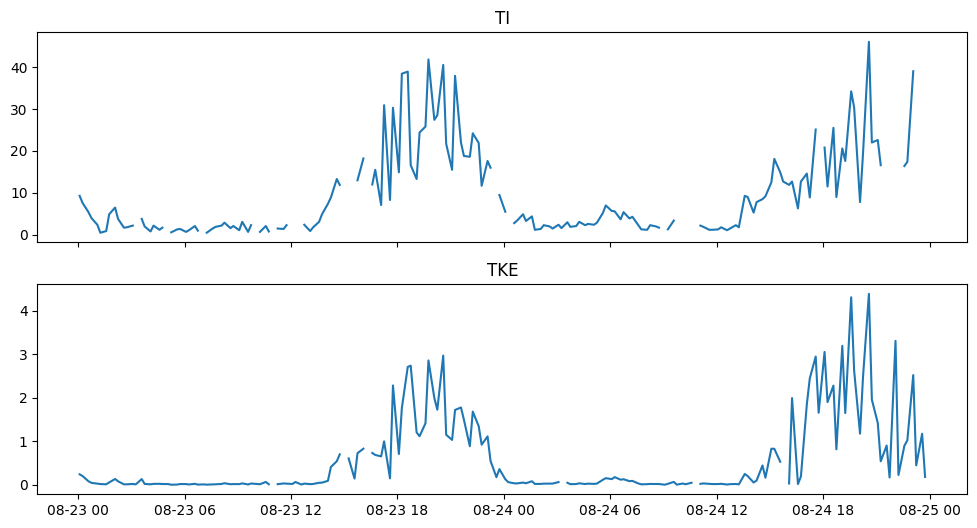

In [23]:
fig, axs = plt.subplots(2,1,figsize=(12,6),sharex=True)
axs[0].plot(TKEds['time'], TKEds['TI'])
axs[0].set_title('TI')
axs[1].plot(TKEds['time'], TKEds['TKE'])
axs[1].set_title('TKE')